<a href="https://colab.research.google.com/github/radyani/Data-Science-Journey/blob/main/08-Regularized_Linear_Regression/HW_REGRESSION_Radyani_Prasasya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regularized Linear Regression**

1. Split data: train - validate - test (point: 10)
2. Draw correlation plot on training data and perform feature selection on
highly correlated features (point: 10)
3. Fit models on training data (lambdas = [0.01, 0.1, 1, 10]) (point:50)
a. Ridge regression (point: 25)
b. LASSO (point: 25)
4. Choose the best lambda from the validation set (point: 20)
a. Use RMSE as metric
b. Interpret a sample of the coefficients of the best model
i. Ridge regression
ii. LASSO

5. Evaluate the best models on the test data (+ interpretation) (point: 10)
a. MAE
b. MAPE
c. RMSE

### **Libraries**

In [355]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Dataset**

The data is about predicting housing price (medv) in
Boston city, features:
1. Criminal rate (crim)
2. Residential land zoned proportion (zn)
3. Non-retail business acres proportion (indus)
4. Is bounds with river (chas)
5. Nitrogen oxides concentration (nox)
6. Number rooms average (rm)
7. Owner age proportion (age)
8. Weighted distance to cities (dis)
9. Accessibility index (rad)
10. Tax rate (tax)
11. Pupil-teacher ratio (ptratio)
12. Black proportion (black)
13. Percent lower status (lstat)

In [356]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [357]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/boston.csv')

In [358]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# **1. Split Data**

## **Split into 3 Sets**

In [360]:
# Split the data in 80:10:10 for train:validate:test dataset

from sklearn.model_selection import train_test_split

train_size=0.8

X = df.drop(columns = ['medv']).copy()
y = df['medv']

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(404, 13)
(51, 13)
(51, 13)


## **VIF Scores**

In [361]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,2.200034
2,zn,2.300358
3,indus,3.815790
4,chas,1.081279
5,nox,4.509398
6,rm,2.028644
7,age,3.059377
8,dis,4.080544
9,rad,7.793114
10,tax,8.700838


Features with High VIF Scores:
1. `rad`
2. `tax`

# **2. Correlation and Feature Selection**

## **Correlation Map**

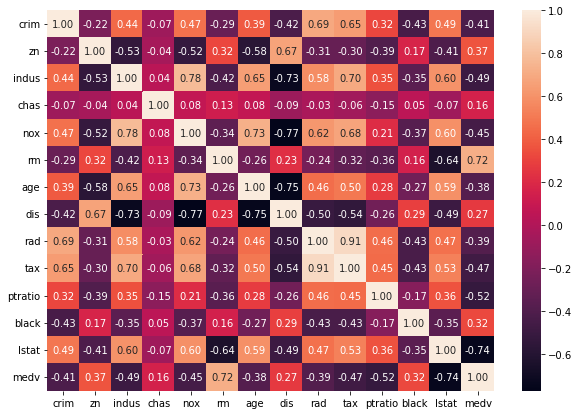

In [362]:
df_train = pd.concat([X_train, y_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

## **Feature Selection**

Since both `rad` and `tax` have very high VIF compared to others, but `tax` have higher correlation (negative) to target `medv`. Thus `rad` is redundant.

In [363]:
# drop redundant features : rad
X_train = X_train.drop(columns=['rad'])
X_valid = X_valid.drop(columns=['rad'])
X_test = X_test.drop(columns=['rad'])

**New VIF**

In [364]:
X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.950854
2,zn,2.271458
3,indus,3.620009
4,chas,1.072210
5,nox,4.413812
6,rm,1.970542
7,age,3.048909
8,dis,4.080112
9,tax,3.449954
10,ptratio,1.659311


# **3. Fit Models on Training Data**

## **a. Ridge Regression**

In [365]:
from sklearn.linear_model import Ridge

# train
X_feat_train = X_train.to_numpy()
y_tgt_train = y_train.to_numpy()
y_tgt_train = y_tgt_train.reshape(len(y_train),)

# define
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit (training)
ridge_reg_pointzeroone.fit(X_feat_train, y_tgt_train)
ridge_reg_pointone.fit(X_feat_train, y_tgt_train)
ridge_reg_one.fit(X_feat_train, y_tgt_train)
ridge_reg_ten.fit(X_feat_train, y_tgt_train)

Ridge(alpha=10, random_state=42)

## **b. LASSO**

In [366]:
from sklearn.linear_model import Lasso

# define
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit (training)
lasso_reg_pointzeroone.fit(X_feat_train, y_tgt_train)
lasso_reg_pointone.fit(X_feat_train, y_tgt_train)
lasso_reg_one.fit(X_feat_train, y_tgt_train)
lasso_reg_ten.fit(X_feat_train, y_tgt_train)

Lasso(alpha=10, random_state=42)

# **4. Best Lambda from Validation Set**

## **a. Ridge Regression**

### **RMSE Analysis**

In [367]:
from sklearn.metrics import mean_squared_error

X_valid = X_valid.to_numpy()
y_valid = y_valid.to_numpy()
y_valid = y_valid.reshape(len(y_valid),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.442432980070073
RMSE of Ridge regression model with alpha = 0.1 is 4.449546795086336
RMSE of Ridge regression model with alpha = 1.0 is 4.5082125856913
RMSE of Ridge regression model with alpha = 10 is 4.649793866491419


According to theory, smaller RMSE gives better model which in this case model with alpha = 0.01 with RMSE 4.442

### **Coefficient**

In [368]:
# Using best model according to RMSE

model = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + X_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,32.100293
1,crim,-0.042511
2,zn,0.039198
3,indus,-0.066741
4,chas,1.703110
5,nox,-15.242249
6,rm,4.077449
7,age,-0.000381
8,dis,-1.435144
9,tax,0.000739


Intercept shows that the average `medv` is {intercept value} when other features = 0

Coefficient tells you how much the dependent variable is expected to increase/decrease when that independent variable increases by one, holding all the other independent variables constant.

`crim`: a unit increase in `crim` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

`zn`: a unit increase in `zn` results in an *increase* in average `medv` by {coefficient value} units, all other variables held constant.

`indus`: a unit increase in `indus` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

`chas`: a unit increase in `chas` results in an *increase* in average `medv` by {coefficient value} units, all other variables held constant.

`nox`: a unit increase in `nox` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

`rm`: a unit increase in `rm` results in an *increase* in average `medv` by {coefficient value} units, all other variables held constant.

`age`: a unit increase in `age` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

`dis`: a unit increase in `dis` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

`tax`: a unit increase in `tax` results in an *increase* in average `medv` by {coefficient value} units, all other variables held constant.

`ptratio`: a unit increase in `ptratio` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

`black`: a unit increase in `black` results in an *increase* in average `medv` by {coefficient value} units, all other variables held constant.

`Istat`: a unit increase in `Istat` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

## **b. LASSO**

### **RMSE Analysis**

In [369]:
alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid,y_predict_validation))
    print(f'RMSE of LASSO regression model with alpha = {alpha} is {rmse}')

RMSE of LASSO regression model with alpha = 0.01 is 4.484777010870255
RMSE of LASSO regression model with alpha = 0.1 is 4.817102086221335
RMSE of LASSO regression model with alpha = 1.0 is 4.864357426425117
RMSE of LASSO regression model with alpha = 10 is 5.175664931953733


According to theory, smaller RMSE gives better model which in this case model with alpha = 0.01 with RMSE 4.484

### **Coefficient**

In [370]:
model = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + X_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,30.073848
1,crim,-0.040910
2,zn,0.039736
3,indus,-0.076863
4,chas,1.499700
5,nox,-11.916267
6,rm,4.082376
7,age,-0.002703
8,dis,-1.380811
9,tax,0.000022


Intercept shows that the average `medv` is {intercept value} when other features = 0

Coefficient tells you how much the dependent variable is expected to increase/decrease when that independent variable increases by one, holding all the other independent variables constant.

`crim`: a unit increase in `crim` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

`zn`: a unit increase in `zn` results in an *increase* in average `medv` by {coefficient value} units, all other variables held constant.

`indus`: a unit increase in `indus` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

`chas`: a unit increase in `chas` results in an *increase* in average `medv` by {coefficient value} units, all other variables held constant.

`nox`: a unit increase in `nox` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

`rm`: a unit increase in `rm` results in an *increase* in average `medv` by {coefficient value} units, all other variables held constant.

`age`: a unit increase in `age` results in an *increase* in average `medv` by {coefficient value} units, all other variables held constant.

`dis`: a unit increase in `dis` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

`tax`: a unit increase in `tax` results in an *increase* in average `medv` by {coefficient value} units, all other variables held constant.

`ptratio`: a unit increase in `ptratio` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

`black`: a unit increase in `black` results in an *increase* in average `medv` by {coefficient value} units, all other variables held constant.

`Istat`: a unit increase in `Istat` results in an *decrease* in average `medv` by {coefficient value} units, all other variables held constant.

# **5. Evaluate Best Model on Test Data**

## **a. Ridge Regression**

### **Diagnostic**

In [377]:
ridge_best = ridge_reg_pointzeroone

from sklearn.metrics import r2_score

y_predict_test = ridge_best.predict(X_test)

print('R-squared for Ridge test data is {}'.format(r2_score(y_predict_test, y_test)))

R-squared for Ridge test data is 0.41474829795244506


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


R-squared is how well the regression model fits the observed data. R-squared of X% reveals that X% (X% = value above) of the data fit the regression model.

R-squared for LASSO test data is 0.41474829795244506. Means 41.47% data fits the regression model.

### **Testing Error**

In [372]:
X_feat_test = X_test.to_numpy()
y_predict_test = ridge_best.predict(X_feat_test)

y_tgt_test = y_test.to_numpy()
y_tgt_test = y_tgt_test.reshape(len(y_tgt_test),)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for Ridge testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_tgt_test))))
print('MAE for Ridge testing data is {}'.format(mean_absolute_error(y_predict_test, y_tgt_test)))
print('MAPE for Ridge testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_tgt_test)))

RMSE for Ridge testing data is 5.33933764348609
MAE for Ridge testing data is 3.3714791096609327
MAPE for Ridge testing data is 0.143917402730255


## **b. LASSO**

### **Diagnostic**

In [373]:
lasso_best = lasso_reg_pointzeroone

y_predict_test = lasso_best.predict(X_test)

print('R-squared for LASSO test data is {}'.format(r2_score(y_predict_test, y_test)))

R-squared for LASSO test data is 0.4109136240912524


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


R-squared is how well the regression model fits the observed data. R-squared of X% reveals that X% (X% = value above) of the data fit the regression model.

R-squared for LASSO test data is 0.4109136240912524. Means 41.09% data fits the regression model.

### **Testing Error**

In [374]:
X_feat_test = X_test.to_numpy()
y_predict_test = lasso_best.predict(X_feat_test)

y_tgt_test = y_test.to_numpy()
y_tgt_test = y_tgt_test.reshape(len(y_tgt_test),)

print('RMSE for LASSO testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_tgt_test))))
print('MAE for LASSO testing data is {}'.format(mean_absolute_error(y_predict_test, y_tgt_test)))
print('MAPE for LASSO testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_tgt_test)))

RMSE for LASSO testing data is 5.345240744785742
MAE for LASSO testing data is 3.3559346998807573
MAPE for LASSO testing data is 0.14359151083312305


## **c. Interpretation**

RMSE for Ridge testing data is 5.33933764348609

MAE for Ridge testing data is 3.3714791096609327

MAPE for Ridge testing data is 0.143917402730255

RMSE for LASSO testing data is 5.345240744785742

MAE for LASSO testing data is 3.3559346998807573

MAPE for LASSO testing data is 0.14359151083312305

Testing error shows the degree of error orr difference of prediction from actual situation. Smaller error is preferrable. Data above shows the error of Ridge Regression method is smaller, thus preferrable. But the difference in error might not be significant